In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('/kaggle/input/sales-data/Final.csv')

In [3]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04-07-2019 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [5]:
df.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [6]:
df.sample(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
13759,189675,Flatscreen TV,1,300,04/20/19 02:34,"405 Cherry St, New York City, NY 10001"
36053,301052,AA Batteries (4-pack),1,3.84,12/22/19 07:28,"45 Maple St, New York City, NY 10001"
34064,299158,Macbook Pro Laptop,1,1700,12-03-2019 21:29,"608 Elm St, San Francisco, CA 94016"
141993,283457,USB-C Charging Cable,1,11.95,11/22/19 10:48,"33 Hickory St, New York City, NY 10001"
87564,232760,Wired Headphones,2,11.99,07/27/19 17:44,"927 14th St, Boston, MA 02215"


In [7]:
df.isnull()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,False,False,False,False,False,False
1,True,True,True,True,True,True
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
186845,False,False,False,False,False,False
186846,False,False,False,False,False,False
186847,False,False,False,False,False,False
186848,False,False,False,False,False,False


In [8]:
df.Product.unique()

array(['USB-C Charging Cable', nan, 'Bose SoundSport Headphones',
       'Google Phone', 'Wired Headphones', 'Macbook Pro Laptop',
       'Lightning Charging Cable', '27in 4K Gaming Monitor',
       'AA Batteries (4-pack)', 'Apple Airpods Headphones',
       'AAA Batteries (4-pack)', 'iPhone', 'Flatscreen TV',
       '27in FHD Monitor', '20in Monitor', 'LG Dryer', 'ThinkPad Laptop',
       'Vareebadd Phone', 'LG Washing Machine', '34in Ultrawide Monitor',
       'Product'], dtype=object)

In [9]:
df = df.dropna()

In [10]:
(df['Product'] == 'Product').sum()

355

In [11]:
# Remove rows where 'Purchase Address' is 'Purchase Address'
df = df[df['Product'] != 'Product']

In [12]:
# Display a few of the duplicate rows to verify
duplicate_rows = df[df.duplicated(keep=False)]
print(duplicate_rows.sort_values(by='Order ID').head())

      Order ID                   Product Quantity Ordered Price Each  \
68422   142071     AA Batteries (4-pack)                1       3.84   
68421   142071     AA Batteries (4-pack)                1       3.84   
71673   145143  Lightning Charging Cable                1      14.95   
71672   145143  Lightning Charging Cable                1      14.95   
73358   146765              Google Phone                1        600   

             Order Date                           Purchase Address  
68422    01/17/19 23:02               131 2nd St, Boston, MA 02215  
68421    01/17/19 23:02               131 2nd St, Boston, MA 02215  
71673  01-06-2019 03:01  182 Jefferson St, San Francisco, CA 94016  
71672  01-06-2019 03:01  182 Jefferson St, San Francisco, CA 94016  
73358    01/21/19 11:23   918 Highland St, New York City, NY 10001  


In [13]:
# Remove duplicates while keeping the first occurrence
df = df.drop_duplicates(keep='first')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185686 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185686 non-null  object
 1   Product           185686 non-null  object
 2   Quantity Ordered  185686 non-null  object
 3   Price Each        185686 non-null  object
 4   Order Date        185686 non-null  object
 5   Purchase Address  185686 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


### What product was sold the most in the whole year and how many were sold?


In [15]:
# Convert 'Quantity Ordered' to numeric, as it might be read as a string from the CSV
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'], errors='coerce')

# Group by 'Product' and sum the 'Quantity Ordered'
product_sales = df.groupby('Product')['Quantity Ordered'].sum()

# Find the product with the maximum quantity sold
most_sold_product = product_sales.idxmax()
most_sold_quantity = product_sales.max()

print(f"The product sold the most is {most_sold_product} with {most_sold_quantity} units sold.")

The product sold the most is AAA Batteries (4-pack) with 30986 units sold.


### What product had the most earning in the whole year and how much was earned?

In [16]:
# Convert 'Quantity Ordered' and 'Price Each' to numeric
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'], errors='coerce')
df['Price Each'] = pd.to_numeric(df['Price Each'], errors='coerce')

# Calculate the earnings for each row
df['Total Earnings'] = df['Quantity Ordered'] * df['Price Each']

# Group by 'Product' and sum the 'Total Earnings'
product_earnings = df.groupby('Product')['Total Earnings'].sum()

# Find the product with the maximum earnings
highest_earning_product = product_earnings.idxmax()
highest_earning_amount = product_earnings.max()

print(f"The product with the most earnings is {highest_earning_product} with a total of ${highest_earning_amount:.2f} earned.")

The product with the most earnings is Macbook Pro Laptop with a total of $8032500.00 earned.


### On average at what time of the day is the sale highest, visualize with graph to show hours user are active throughout the day for the whole year?

In [17]:
# Normalize the 'Order Date' to a uniform datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

# Extract the hour from 'Order Date'
df['Hour'] = df['Order Date'].dt.hour

# Convert 'Quantity Ordered' to numeric, in case it's read as a string
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'], errors='coerce')

# Group by the hour and sum the quantities ordered
hourly_sales = df.groupby('Hour')['Quantity Ordered'].sum()

# Find the hour with the highest sales
max_sales_hour = hourly_sales.idxmax()

print(f"The hour with the highest sales is {max_sales_hour}.")

The hour with the highest sales is 19.


0


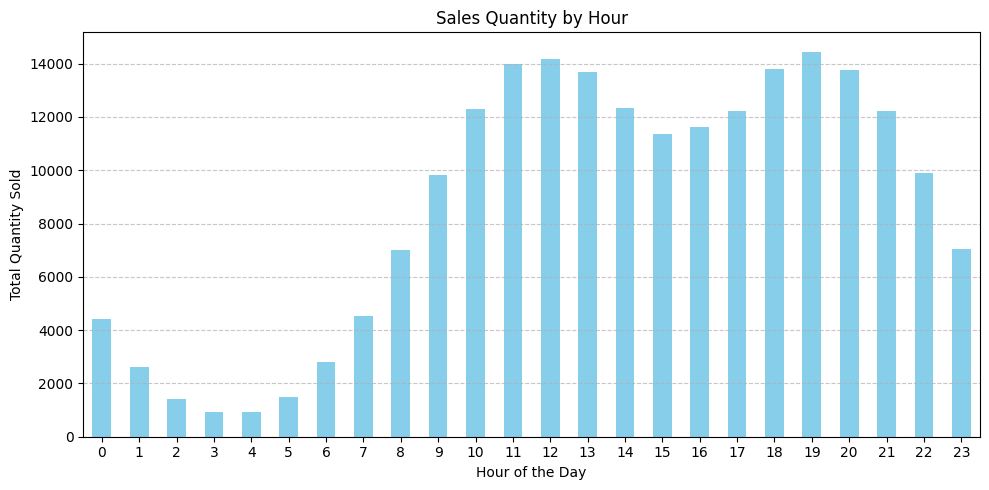

In [18]:
import matplotlib.pyplot as plt

# Normalize the 'Order Date' to a uniform datetime format
# Pandas can automatically detect different separators
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

# Check if there are any null values after conversion which might indicate parsing errors
print(df['Order Date'].isnull().sum())

# Extract the hour from 'Order Date'
df['Hour'] = df['Order Date'].dt.hour

# Group by the hour and sum the quantities ordered
hourly_sales = df.groupby('Hour')['Quantity Ordered'].sum()

# Plotting
plt.figure(figsize=(10, 5))
hourly_sales.plot(kind='bar', color='skyblue')
plt.title('Sales Quantity by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=0)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Rank and visualize using graph to show top 4 months of earning

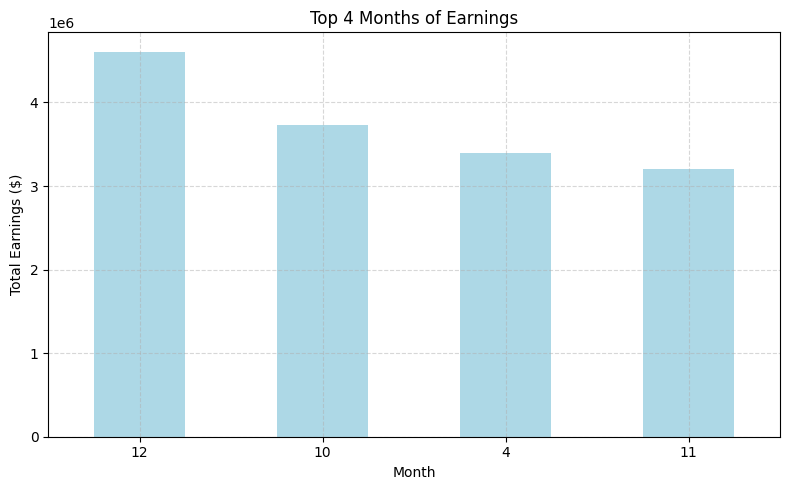

In [19]:
# Convert 'Price Each' to numeric
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'], errors='coerce')
df['Price Each'] = pd.to_numeric(df['Price Each'], errors='coerce')

# Calculate the earnings for each order
df['Earnings'] = df['Quantity Ordered'] * df['Price Each']

# Extract the month from the 'Order Date'
df['Month'] = df['Order Date'].dt.month

# Group by month and sum the earnings
monthly_earnings = df.groupby('Month')['Earnings'].sum()

# Sort the earnings to find the top 4 months
top_months = monthly_earnings.sort_values(ascending=False).head(4)

# Plotting
plt.figure(figsize=(8, 5))
top_months.plot(kind='bar', color='lightblue')
plt.title('Top 4 Months of Earnings')
plt.xlabel('Month')
plt.ylabel('Total Earnings ($)')
plt.xticks(rotation=0)  # Keep the month labels horizontal for better readability
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### Which "different products" (NOTE: this doesn't mean same product bought in 2 or more quantity)  were bought in combos the most?

In [20]:
# Convert 'Quantity Ordered' to numeric
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'], errors='coerce')

# Filter out orders with only one item 
# We're grouping by 'Order ID' and filtering out those groups with only one type of product
combo_orders = df[df['Order ID'].duplicated(keep=False)].copy()

# Group the products by 'Order ID' and combine them into a list
combo_orders['Grouped Products'] = combo_orders.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

# Drop duplicate Order IDs since they have the same combined products
combo_orders = combo_orders[['Order ID', 'Grouped Products']].drop_duplicates()

# Count the occurrences of each product combination
combo_count = combo_orders['Grouped Products'].value_counts()

# Print the top product combinations
print(combo_count.head())

Grouped Products
iPhone,Lightning Charging Cable         886
Google Phone,USB-C Charging Cable       857
iPhone,Wired Headphones                 361
Vareebadd Phone,USB-C Charging Cable    312
Google Phone,Wired Headphones           303
Name: count, dtype: int64


### Top 10 dates with the most sale in the whole year?

In [21]:
# Calculate the earnings for each order
df['Earnings'] = df['Quantity Ordered'] * df['Price Each']

# Group by the date part of the 'Order Date' (ignoring time)
df['Date'] = df['Order Date'].dt.date
daily_sales = df.groupby('Date')['Earnings'].sum()

# Sort the daily sales to find the top 10 dates with the most sales
top_sales_dates = daily_sales.sort_values(ascending=False).head(10)

# Print the top 10 dates
print(top_sales_dates)

Date
2019-12-04    166577.69
2019-12-16    162970.61
2019-12-10    162820.75
2019-12-20    160178.31
2019-12-17    157357.04
2019-12-29    156009.67
2019-12-05    155079.30
2019-12-21    154656.88
2019-12-18    154598.77
2019-12-24    152888.82
Name: Earnings, dtype: float64


### What are all the unique products being sold by this e-commerce company?

In [22]:
# Extract unique products
unique_products = df['Product'].unique()

# Print the list of unique products
print(unique_products)

['USB-C Charging Cable' 'Bose SoundSport Headphones' 'Google Phone'
 'Wired Headphones' 'Macbook Pro Laptop' 'Lightning Charging Cable'
 '27in 4K Gaming Monitor' 'AA Batteries (4-pack)'
 'Apple Airpods Headphones' 'AAA Batteries (4-pack)' 'iPhone'
 'Flatscreen TV' '27in FHD Monitor' '20in Monitor' 'LG Dryer'
 'ThinkPad Laptop' 'Vareebadd Phone' 'LG Washing Machine'
 '34in Ultrawide Monitor']


### Rank by cities (San Francisco, New York, Dallas, etc) which has the most sales & earning for the whole year

In [23]:
# Find entries in 'Purchase Address' that might cause the issue
problematic_addresses = df[df['Purchase Address'].apply(lambda x: ',' not in x)]
print(problematic_addresses['Purchase Address'])


Series([], Name: Purchase Address, dtype: object)


In [24]:
# Extract the city from 'Purchase Address'
df['City'] = df['Purchase Address'].apply(lambda x: x.split(',')[1].strip())

# Group by 'City' and sum 'Quantity Ordered' and 'Earnings'
city_sales = df.groupby('City').agg({
    'Quantity Ordered': 'sum',
    'Earnings': 'sum'
})

# Sort by 'Earnings' to find the city with the highest earnings
city_sales = city_sales.sort_values(by='Earnings', ascending=False)

# Display the ranked cities by sales and earnings
print(city_sales)

               Quantity Ordered    Earnings
City                                       
San Francisco             50169  8254743.55
Los Angeles               33247  5448304.28
New York City             27903  4661867.14
Boston                    22494  3658627.65
Atlanta                   16584  2794199.07
Dallas                    16707  2765373.96
Seattle                   16534  2745046.02
Portland                  14037  2319331.94
Austin                    11137  1818044.33


### Which state (TX, GA, WA, CA, etc) has the most sales & earning for the whole year

In [25]:
# Extract the state from 'Purchase Address'
df['State'] = df['Purchase Address'].apply(lambda x: x.split(',')[2].strip().split(' ')[0])

# Group by 'State' and sum 'Quantity Ordered' and 'Earnings'
state_sales = df.groupby('State').agg({
    'Quantity Ordered': 'sum',
    'Earnings': 'sum'
})

# Sort by 'Earnings' to find the state with the highest earnings
state_sales = state_sales.sort_values(by='Earnings', ascending=False)

# Display the ranked states by sales and earnings
print(state_sales)
print("State with max sales and earnings is CA")

       Quantity Ordered     Earnings
State                               
CA                83416  13703047.83
NY                27903   4661867.14
TX                27844   4583418.29
MA                22494   3658627.65
GA                16584   2794199.07
WA                16534   2745046.02
OR                11291   1870010.56
ME                 2746    449321.38
State with max sales and earnings is CA


### Let's consider some categories: Headphones, Laptop, Monitor, Phone, Charging Cable, Batteries and Miscellaneous. Show how each of these categories perform by using graphs and also show which has the most sales and which has the most earnings for the whole year?

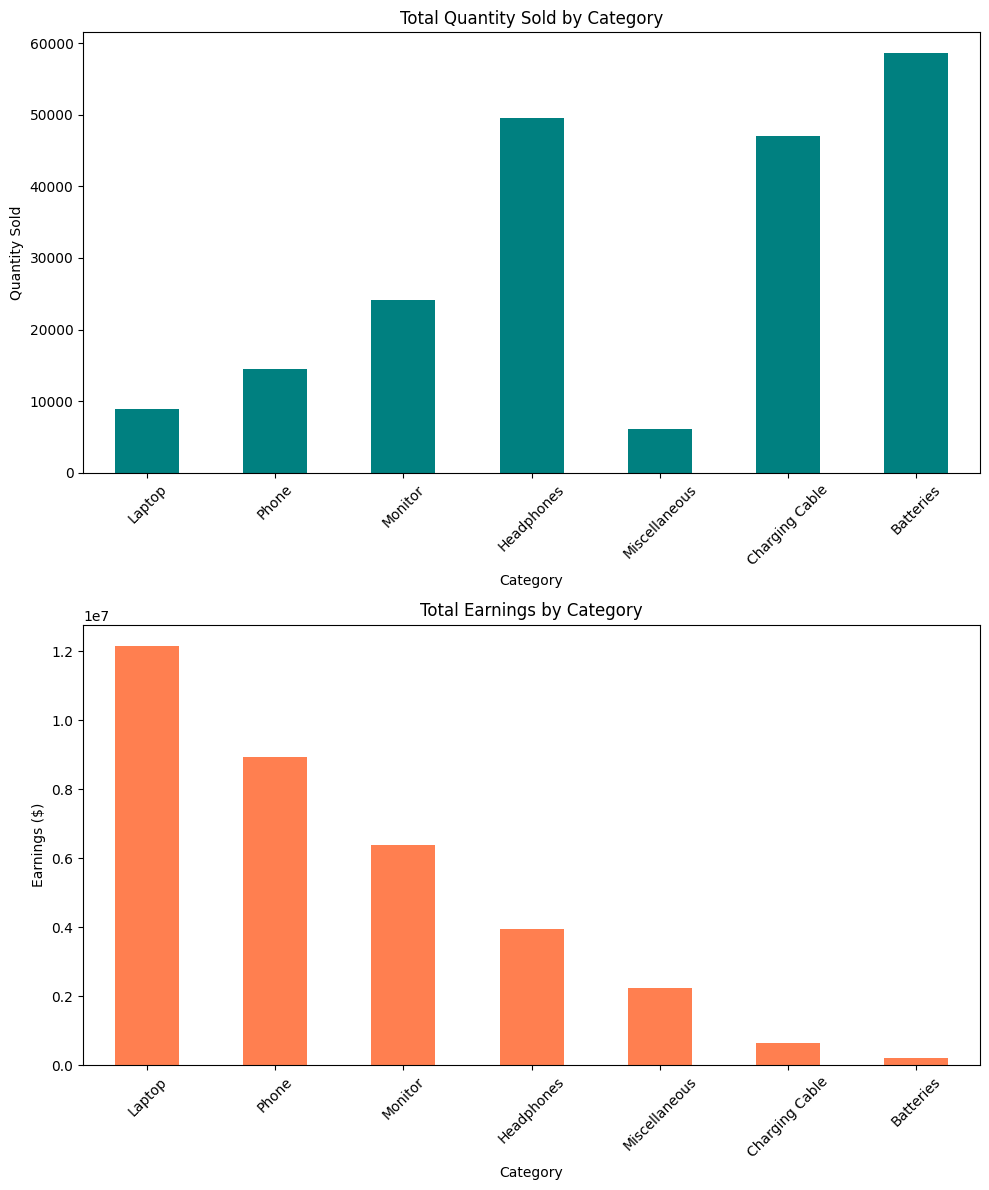

Category with the most sales: Batteries
Category with the most earnings: Laptop


In [26]:
# Categorizing products
category_map = {
    'Headphones': ['Bose SoundSport Headphones', 'Apple Airpods Headphones', 'Wired Headphones'],
    'Laptop': ['Macbook Pro Laptop', 'ThinkPad Laptop'],
    'Monitor': ['27in 4K Gaming Monitor', '27in FHD Monitor', '20in Monitor', '34in Ultrawide Monitor'],
    'Phone': ['Google Phone', 'iPhone', 'Vareebadd Phone'],
    'Charging Cable': ['USB-C Charging Cable', 'Lightning Charging Cable'],
    'Batteries': ['AA Batteries (4-pack)', 'AAA Batteries (4-pack)'],
    'Miscellaneous': ['LG Dryer', 'LG Washing Machine', 'Flatscreen TV']
}

# Reverse map to easily look up categories
product_to_category = {product: category for category, products in category_map.items() for product in products}

# Assign category to each row based on product
df['Category'] = df['Product'].map(product_to_category).fillna('Miscellaneous')

# Group by category and sum 'Quantity Ordered' and 'Earnings'
category_sales = df.groupby('Category').agg({
    'Quantity Ordered': 'sum',
    'Earnings': 'sum'
})

# Sort by 'Earnings' to find the category with the highest earnings
category_sales = category_sales.sort_values(by='Earnings', ascending=False)

# Plotting
fig, ax = plt.subplots(2, 1, figsize=(10, 12))
category_sales['Quantity Ordered'].plot(kind='bar', ax=ax[0], color='teal')
ax[0].set_title('Total Quantity Sold by Category')
ax[0].set_xlabel('Category')
ax[0].set_ylabel('Quantity Sold')
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45)

category_sales['Earnings'].plot(kind='bar', ax=ax[1], color='coral')
ax[1].set_title('Total Earnings by Category')
ax[1].set_xlabel('Category')
ax[1].set_ylabel('Earnings ($)')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

# Displaying the top categories
print("Category with the most sales:", category_sales['Quantity Ordered'].idxmax())
print("Category with the most earnings:", category_sales['Earnings'].idxmax())

### What are more unique insights or patterns can you find on your own for the given dataset besides the questions asked above? Perform any EDA or any thing you might have to for this.

## 1) Seasonal Trends

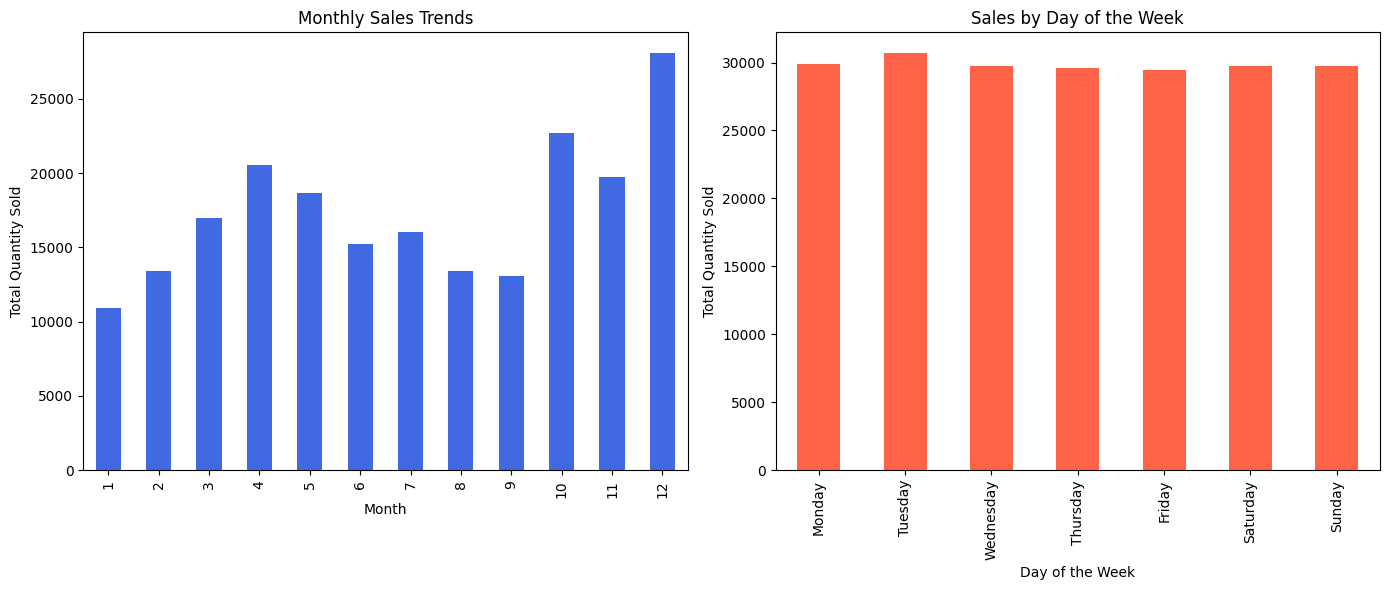

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Monthly Sales Trends
monthly_sales = df.groupby('Month')['Quantity Ordered'].sum()

# Extract day of the week as a new column
df['Day of Week'] = df['Order Date'].dt.day_name()

# Daily Sales Trends
daily_sales = df.groupby('Day of Week')['Quantity Ordered'].sum().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Plotting
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
monthly_sales.plot(kind='bar', color='royalblue')
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Quantity Sold')

plt.subplot(1, 2, 2)
daily_sales.plot(kind='bar', color='tomato')
plt.title('Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Quantity Sold')

plt.tight_layout()
plt.show()

## 2) Repeat Customers Identification

In [28]:
# Assuming each 'Purchase Address' corresponds to a unique customer

# Count occurrences of each address
customer_frequency = df['Purchase Address'].value_counts()

# Identify addresses with more than one order
repeat_customers = customer_frequency[customer_frequency > 1]

# Display the top repeat customers
print("Number of repeat customers:", repeat_customers.count())
print("Top repeat customers:\n", repeat_customers.head())

Number of repeat customers: 35058
Top repeat customers:
 Purchase Address
193 Forest St, San Francisco, CA 94016    9
279 Sunset St, San Francisco, CA 94016    8
223 Elm St, Los Angeles, CA 90001         8
550 Cherry St, San Francisco, CA 94016    7
716 5th St, San Francisco, CA 94016       7
Name: count, dtype: int64


## 3) Geographic analysis

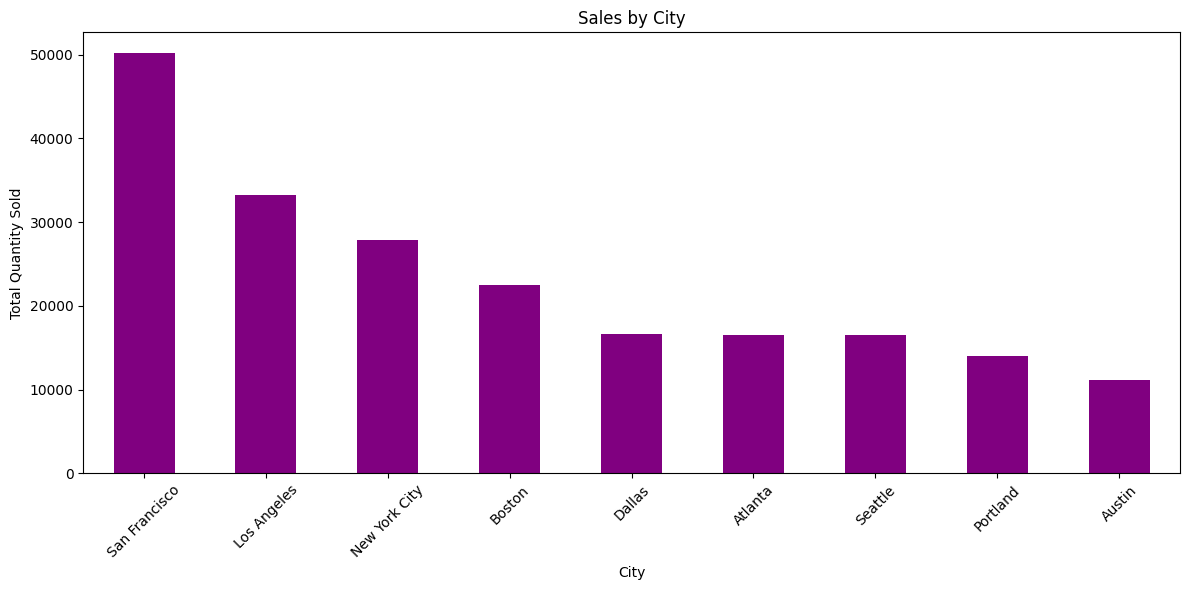

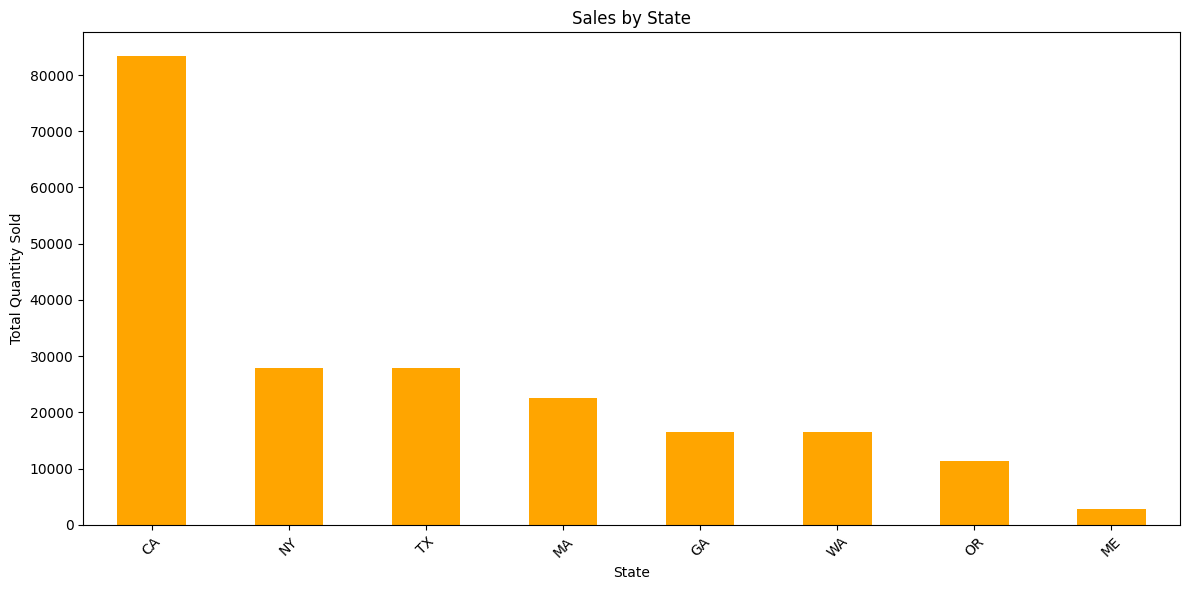

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sales by City
city_sales = df.groupby('City')['Quantity Ordered'].sum().sort_values(ascending=False)

# Sales by State
state_sales = df.groupby('State')['Quantity Ordered'].sum().sort_values(ascending=False)

# Plotting Sales by City
plt.figure(figsize=(12, 6))
city_sales.plot(kind='bar', color='purple')
plt.title('Sales by City')
plt.xlabel('City')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting Sales by State
plt.figure(figsize=(12, 6))
state_sales.plot(kind='bar', color='orange')
plt.title('Sales by State')
plt.xlabel('State')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 4) Market Penetration

In [30]:
# Calculate the mean sales per city and find cities below the mean
mean_sales = city_sales.mean()
underperforming_cities = city_sales[city_sales < mean_sales]

# Display underperforming cities
print("Underperforming Cities:\n", underperforming_cities)

Underperforming Cities:
 City
Boston      22494
Dallas      16707
Atlanta     16584
Seattle     16534
Portland    14037
Austin      11137
Name: Quantity Ordered, dtype: int64


## 5) Profitability Analysis

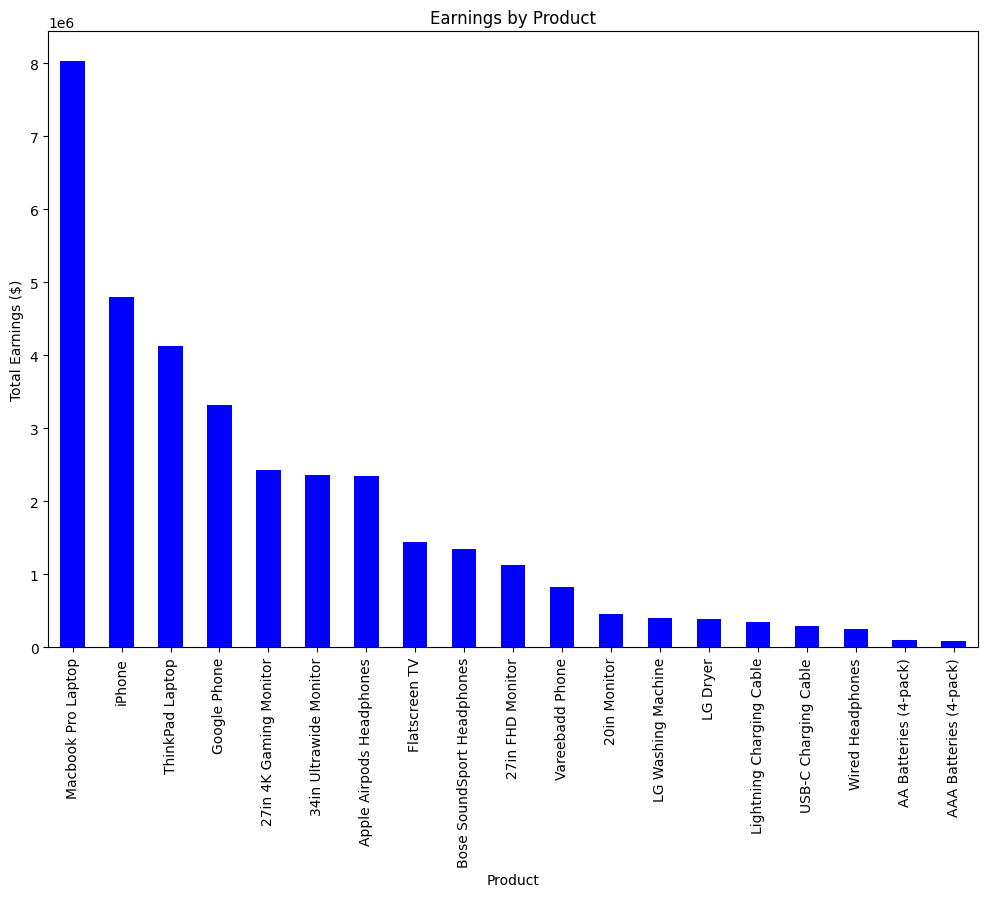

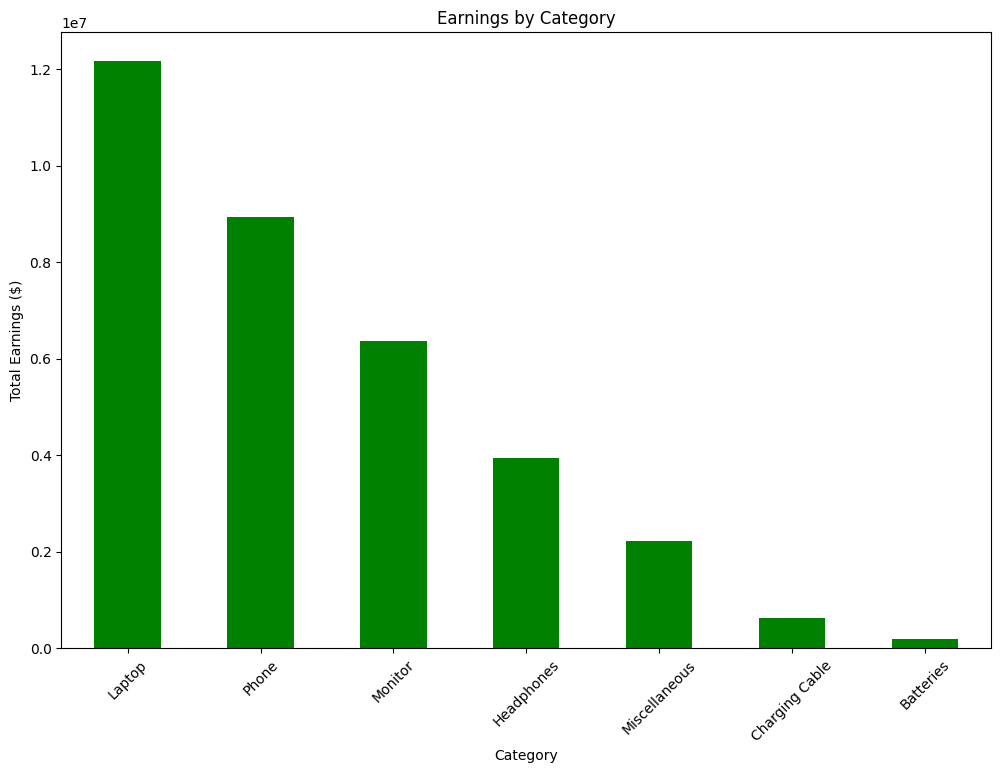

In [31]:
# Calculate total earnings for each product
df['Earnings'] = df['Quantity Ordered'] * df['Price Each']
product_earnings = df.groupby('Product')['Earnings'].sum().sort_values(ascending=False)

# Calculate total earnings for each category
category_earnings = df.groupby('Category')['Earnings'].sum().sort_values(ascending=False)

# Plotting Earnings by Product
plt.figure(figsize=(12, 8))
product_earnings.plot(kind='bar', color='blue')
plt.title('Earnings by Product')
plt.xlabel('Product')
plt.ylabel('Total Earnings ($)')
plt.xticks(rotation=90)
plt.show()

# Plotting Earnings by Category
plt.figure(figsize=(12, 8))
category_earnings.plot(kind='bar', color='green')
plt.title('Earnings by Category')
plt.xlabel('Category')
plt.ylabel('Total Earnings ($)')
plt.xticks(rotation=45)
plt.show()

## 6) Customer Segmentation

In [32]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Creating a new DataFrame for customer segmentation
# Group data by 'Purchase Address' assuming it uniquely identifies each customer
customer_data = df.groupby('Purchase Address').agg({
    'Earnings': 'sum',          # Total money spent
    'Order ID': pd.Series.nunique,  # Count of unique orders
    'Product': lambda x: x.mode()[0]  # Most frequently purchased product
}).rename(columns={'Order ID': 'Total Orders', 'Product': 'Most Frequent Product'})

# Preprocessing data for clustering
# For simplicity, we'll focus on Earnings and Total Orders
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
customer_features = customer_data[['Earnings', 'Total Orders']]
customer_scaled = scaler.fit_transform(customer_features)


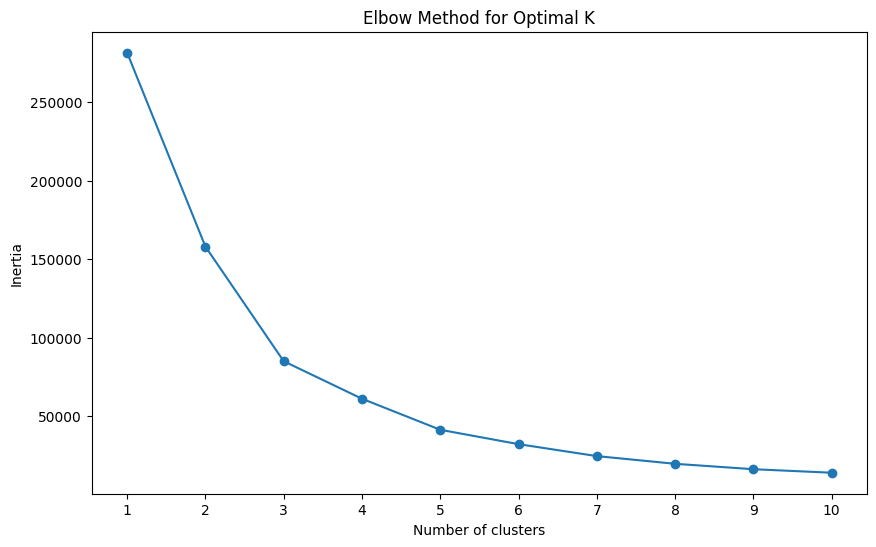

In [33]:
# Choosing the number of clusters via the Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(customer_scaled)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.show()

# Fit K-Means with the optimal number of clusters
optimal_k = 4  # example based on the Elbow plot
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
customer_data['Cluster'] = kmeans.fit_predict(customer_scaled)

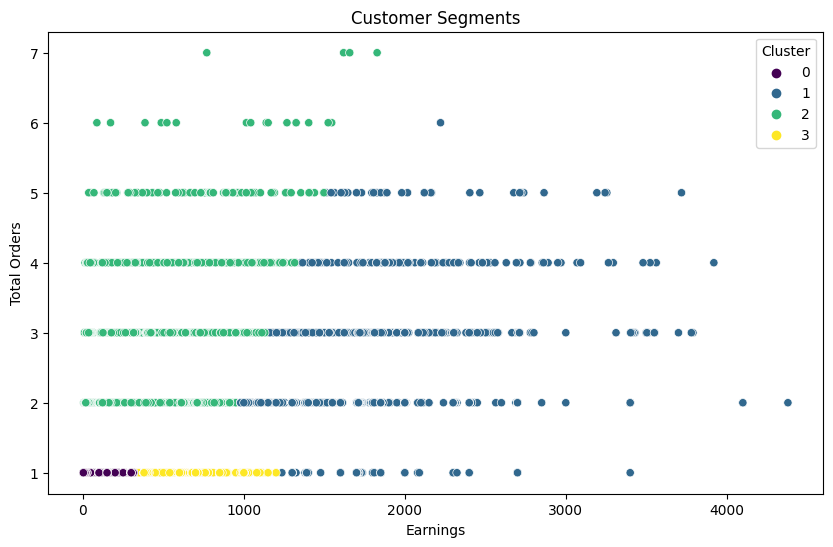

   Average Earnings  Average Total Orders  Cluster
0         53.625020              1.000000        0
1       1619.060123              1.728544        1
2        270.033887              2.211960        2
3        583.779336              1.000000        3


In [34]:
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Fit K-Means clustering
scaler = StandardScaler()
customer_features_scaled = scaler.fit_transform(customer_data[['Earnings', 'Total Orders']])
kmeans = KMeans(n_clusters=4, random_state=0)
customer_data['Cluster'] = kmeans.fit_predict(customer_features_scaled)

# Visualizing clusters for Earnings vs. Total Orders
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Earnings', y='Total Orders', hue='Cluster', data=customer_data, palette='viridis', legend='full')
plt.title('Customer Segments')
plt.xlabel('Earnings')
plt.ylabel('Total Orders')
plt.legend(title='Cluster')
plt.show()

# Examine the central features of each cluster
# The scaler is used to transform the cluster centers back to the original scale
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_summary = pd.DataFrame(cluster_centers, columns=['Average Earnings', 'Average Total Orders'])
cluster_summary['Cluster'] = range(0, 4)  # Ensure clusters are numbered from 0
print(cluster_summary)